In [4]:
!pip install numpy pandas scikit-fuzzy matplotlib seaborn

In [6]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
# Load the cleaned dataset
import pandas as pd

# pastikan file Sleep_health_and_lifestyle_dataset.csv ada di folder kerja yang sama
data = pd.read_csv('./Sleep_health_and_lifestyle_dataset.csv')

# Display first 30% of the dataset
percentage = 0.3
data[:int(len(data) * percentage)]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,108,Male,37,Engineer,7.8,8,70,4,Normal Weight,120/80,68,7000,NaN
108,109,Male,37,Engineer,7.8,8,70,4,Normal Weight,120/80,68,7000,NaN
109,110,Male,37,Lawyer,7.4,8,60,5,Normal,130/85,68,8000,NaN
110,111,Female,37,Accountant,7.2,8,60,4,Normal,115/75,68,7000,NaN


In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Tentukan range nilai dari dataset
min_sleep = data['Sleep Duration'].min()
max_sleep = data['Sleep Duration'].max()
min_stress = data['Stress Level'].min()
max_stress = data['Stress Level'].max()
min_activity = data['Physical Activity Level'].min()
max_activity = data['Physical Activity Level'].max()

print(f"Sleep Duration Range: {min_sleep} - {max_sleep}")
print(f"Stress Level Range: {min_stress} - {max_stress}")
print(f"Physical Activity Level Range: {min_activity} - {max_activity}")

# Definisikan variabel fuzzy
sleep_duration = ctrl.Antecedent(np.arange(min_sleep, max_sleep + 0.5, 0.5), 'sleep_duration')
stress_level = ctrl.Antecedent(np.arange(min_stress, max_stress + 1, 1), 'stress_level')
physical_activity = ctrl.Antecedent(np.arange(min_activity, max_activity + 1, 1), 'physical_activity')
sleep_quality = ctrl.Consequent(np.arange(0, 11, 1), 'sleep_quality')

Sleep Duration Range: 5.8 - 8.5
Stress Level Range: 3 - 8
Physical Activity Level Range: 30 - 90


In [34]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definisi variabel fuzzy (universe untuk setiap variabel)
sleep_duration = ctrl.Antecedent(np.arange(0, 13, 1), 'sleep_duration')
stress_level = ctrl.Antecedent(np.arange(0, 11, 1), 'stress_level')
physical_activity = ctrl.Antecedent(np.arange(0, 11, 1), 'physical_activity')
sleep_health = ctrl.Consequent(np.arange(0, 11, 1), 'sleep_health')

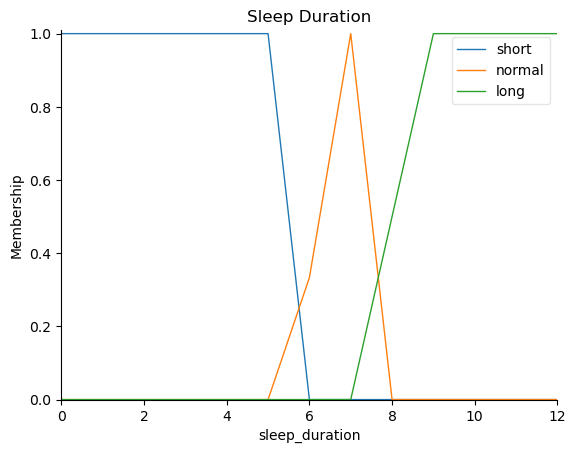

In [37]:
sleep_duration['short'] = fuzz.trapmf(sleep_duration.universe, [0, 0, 5, 6])
sleep_duration['normal'] = fuzz.trimf(sleep_duration.universe, [5.5, 7, 8])
sleep_duration['long'] = fuzz.trapmf(sleep_duration.universe, [7.5, 8.5, 12, 12])

sleep_duration.view()
plt.title('Sleep Duration')
plt.show()

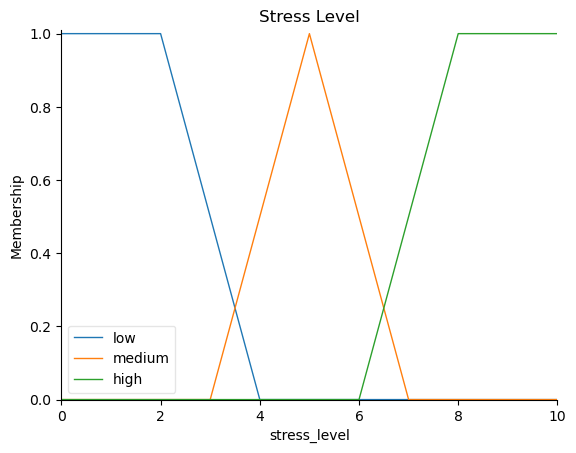

In [39]:
# Stress Level
stress_level['low'] = fuzz.trapmf(stress_level.universe, [0, 0, 2, 4])
stress_level['medium'] = fuzz.trimf(stress_level.universe, [3, 5, 7])
stress_level['high'] = fuzz.trapmf(stress_level.universe, [6, 8, 10, 10])

stress_level.view()
plt.title('Stress Level')
plt.show()

C:\Users\User\anaconda\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


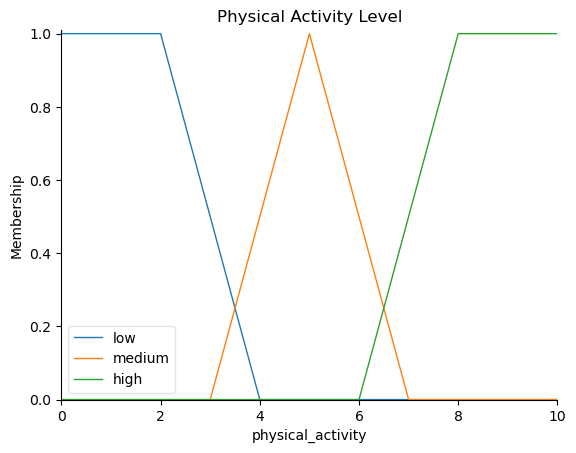

In [56]:
# Physical Activity Level
physical_activity['low'] = fuzz.trapmf(physical_activity.universe, [0, 0, 2, 4])
physical_activity['medium'] = fuzz.trimf(physical_activity.universe, [3, 5, 7])
physical_activity['high'] = fuzz.trapmf(physical_activity.universe, [6, 8, 10, 10])

physical_activity.view()
plt.title('Physical Activity Level')
plt.show()

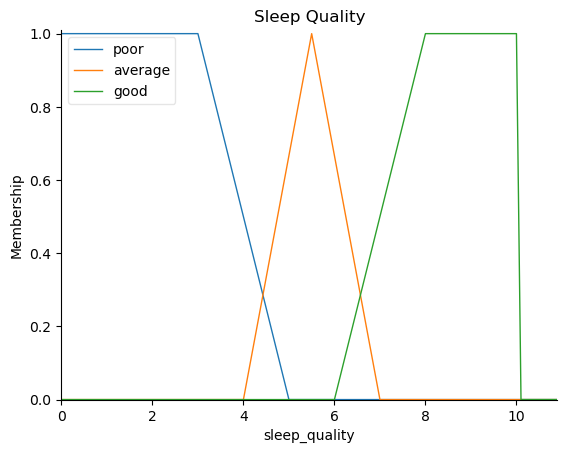

In [40]:
# Sleep Quality
sleep_health['poor'] = fuzz.trapmf(sleep_health.universe, [0, 0, 3, 5])
sleep_health['average'] = fuzz.trimf(sleep_health.universe, [4, 5.5, 7])
sleep_health['excellent'] = fuzz.trapmf(sleep_health.universe, [6, 8, 10, 10])

sleep_quality.view()
plt.title('Sleep Quality')
plt.show()

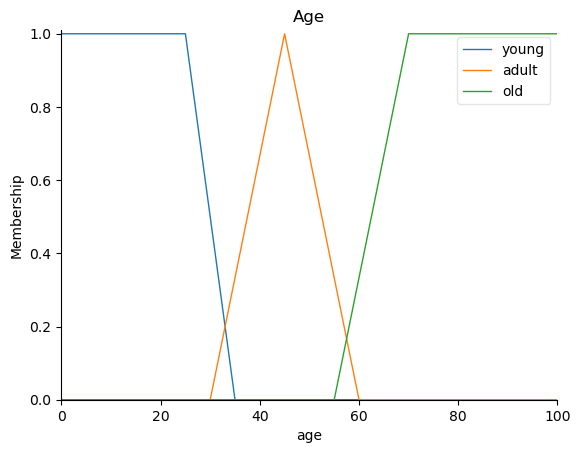

In [47]:
# Definisi variabel umur
age = ctrl.Antecedent(np.arange(0, 101, 1), 'age')

# Membership Function untuk umur
age['young'] = fuzz.trapmf(age.universe, [0, 0, 25, 35])
age['adult'] = fuzz.trimf(age.universe, [30, 45, 60])
age['old'] = fuzz.trapmf(age.universe, [55, 70, 100, 100])

# Lihat grafiknya
age.view()
plt.title('Age')
plt.show()

In [51]:
rule1 = ctrl.Rule(sleep_duration['long'] & stress_level['low'], sleep_quality['good'])
rule2 = ctrl.Rule(sleep_duration['normal'] & stress_level['medium'], sleep_quality['average'])
rule3 = ctrl.Rule(sleep_duration['short'] & stress_level['high'], sleep_quality['poor'])
rule4 = ctrl.Rule(sleep_duration['long'] & age['young'], sleep_quality['good'])
rule5 = ctrl.Rule(sleep_duration['normal'] & age['adult'], sleep_quality['average'])
rule6 = ctrl.Rule(sleep_duration['short'] & age['old'], sleep_quality['poor'])

In [53]:
sleep_quality_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
sleep_quality_sim = ctrl.ControlSystemSimulation(sleep_quality_ctrl)

In [59]:
def compute_sleep_quality(row):
    sim = ctrl.ControlSystemSimulation(sleep_quality_ctrl)
    try:
        # Ambil nilai input dari dataset
        dur = row['Sleep Duration']
        stress = row['Stress Level']
        activity = row['Physical Activity Level']
        umur = row['Age']

        # Pastikan nilai tetap dalam range universe
        dur = np.clip(dur, sleep_duration.universe[0], sleep_duration.universe[-1])
        stress = np.clip(stress, stress_level.universe[0], stress_level.universe[-1])
        activity = np.clip(activity, physical_activity.universe[0], physical_activity.universe[-1])
        umur = np.clip(umur, age.universe[0], age.universe[-1])

        # Set input ke simulasi fuzzy
        sim.input['sleep_duration'] = dur
        sim.input['stress_level'] = stress
        sim.input['physical_activity'] = activity
        sim.input['age'] = umur

        # Jalankan perhitungan fuzzy
        sim.compute()

        return sim.output['sleep_quality']

    except Exception as ex:
        print(f"Error computing row {row.name}: {ex}")
        print(f"Inputs: sleep={dur}, stress={stress}, activity={activity}, age={umur}")
        return np.nan

In [61]:
data.head

<bound method NDFrame.head of      Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   O

In [62]:
# Function to classify sleep quality category
def classify_sleep(score):
    if score >= 7.0:
        return 'Excellent'
    elif score >= 4.0:
        return 'Average'
    else:
        return 'Poor'

# Apply the classification to the dataset
data['sleep_quality_category'] = data['sleep_quality_score'].apply(classify_sleep)

# Display a few rows to verify
display(data[['Person ID', 'sleep_quality_score', 'sleep_quality_category']].head(10))


,Person ID,sleep_quality_score,sleep_quality_category
0,1,NaN,Poor
1,2,NaN,Poor
2,3,NaN,Poor
3,4,NaN,Poor
4,5,NaN,Poor
5,6,NaN,Poor
6,7,NaN,Poor
7,8,NaN,Poor
8,9,NaN,Poor
9,10,NaN,Poor


In [71]:
# Display the top 10 people with the highest sleep quality scores
top_sleepers = data.sort_values(by='sleep_quality_score', ascending=False)

# Save the top sleepers to a CSV file
top_sleepers.to_csv('./top-sleep-quality.csv', index=False)

# Display top 10 individuals with best sleep quality
top_sleepers[['Person ID', 'Sleep Duration', 'Stress Level', 
              'Physical Activity Level', 'Age', 
              'sleep_quality_score', 'sleep_quality_category']].head(10)


,Person ID,Sleep Duration,Stress Level,Physical Activity Level,Age,sleep_quality_score,sleep_quality_category
0,1,6.1,6,42,27,NaN,Poor
1,2,6.2,8,60,28,NaN,Poor
2,3,6.2,8,60,28,NaN,Poor
3,4,5.9,8,30,28,NaN,Poor
4,5,5.9,8,30,28,NaN,Poor
5,6,5.9,8,30,28,NaN,Poor
6,7,6.3,7,40,29,NaN,Poor
7,8,7.8,6,75,29,NaN,Poor
8,9,7.8,6,75,29,NaN,Poor
9,10,7.8,6,75,29,NaN,Poor


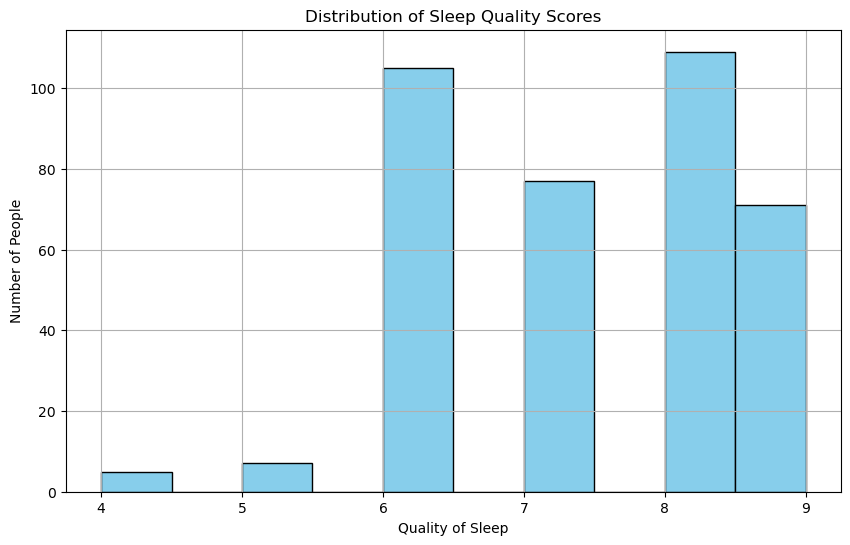

In [76]:
# Plot distribusi kualitas tidur
plt.figure(figsize=(10,6))
plt.hist(data['Quality of Sleep'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Sleep Quality Scores')
plt.xlabel('Quality of Sleep')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

Sleep Disorder Category Counts:
Sleep Disorder
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


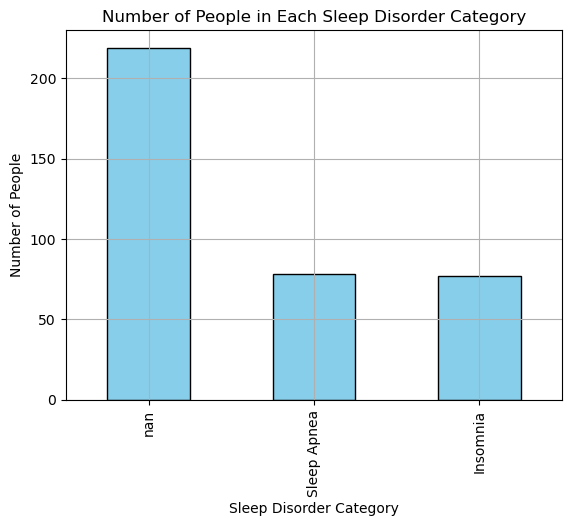

In [77]:
# Hitung jumlah orang di setiap kategori gangguan tidur
category_counts = data['Sleep Disorder'].value_counts(dropna=False)
print("Sleep Disorder Category Counts:")
print(category_counts)

# Plot jumlah orang per kategori
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of People in Each Sleep Disorder Category')
plt.xlabel('Sleep Disorder Category')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()